In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gc

In [64]:
cmap1 = plt.get_cmap("tab20")
cmap2 = plt.get_cmap("tab20b")
cmap3 = plt.get_cmap("tab20c")
cmap4 = plt.get_cmap("Accent")
def colors():
    for c in np.concatenate((cmap1(np.arange(20)), cmap2(np.arange(20)), cmap3(np.arange(20)),cmap4(np.arange(8)))):
        yield c

In [62]:
#GTEx
df = pd.read_csv('https://storage.googleapis.com/gtex_analysis_v8/rna_seq_data/GTEx_Analysis_2017-06-05_v8_RNASeQCv1.1.9_gene_reads.gct.gz', skiprows=2, compression='gzip', sep='\t')
df['ensg'] = [x[:15] for x in df['Name']]
df.set_index('Name', inplace=True)
df.set_index(['ensg'],inplace=True)
df=df.drop(['Description'],1)

df_file = pd.read_csv("https://storage.googleapis.com/gtex_analysis_v8/annotations/GTEx_Analysis_v8_Annotations_SampleAttributesDS.txt", sep='\t').loc[:,['SAMPID','SMTS', 'SMTSD']]
df_file.set_index('SAMPID', inplace=True)

gc.collect()

In [ ]:
genelist=pd.read_csv("https://stephenslab.github.io/count-clustering/project/utilities/gene_names_all_gtex.txt", header=None).values.ravel()
df = df[df.index.isin(genelist)]

In [79]:
plot_data = {}
for tissue in np.sort(df_files["SMTS"].unique()):
    print(tissue)
    f = df.reindex(columns=df_files[df_files["SMTS"]==tissue]['SAMPID'].values).mean(1).sort_values(ascending=False)
    plot_data[tissue]=f
    del f
    gc.collect()

Adipose Tissue
Adrenal Gland
Bladder
Blood
Blood Vessel
Bone Marrow
Brain
Breast
Cervix Uteri
Colon
Esophagus
Fallopian Tube
Heart
Kidney
Liver
Lung
Muscle
Nerve
Ovary
Pancreas
Pituitary
Prostate
Salivary Gland
Skin
Small Intestine
Spleen
Stomach
Testis
Thyroid
Uterus
Vagina


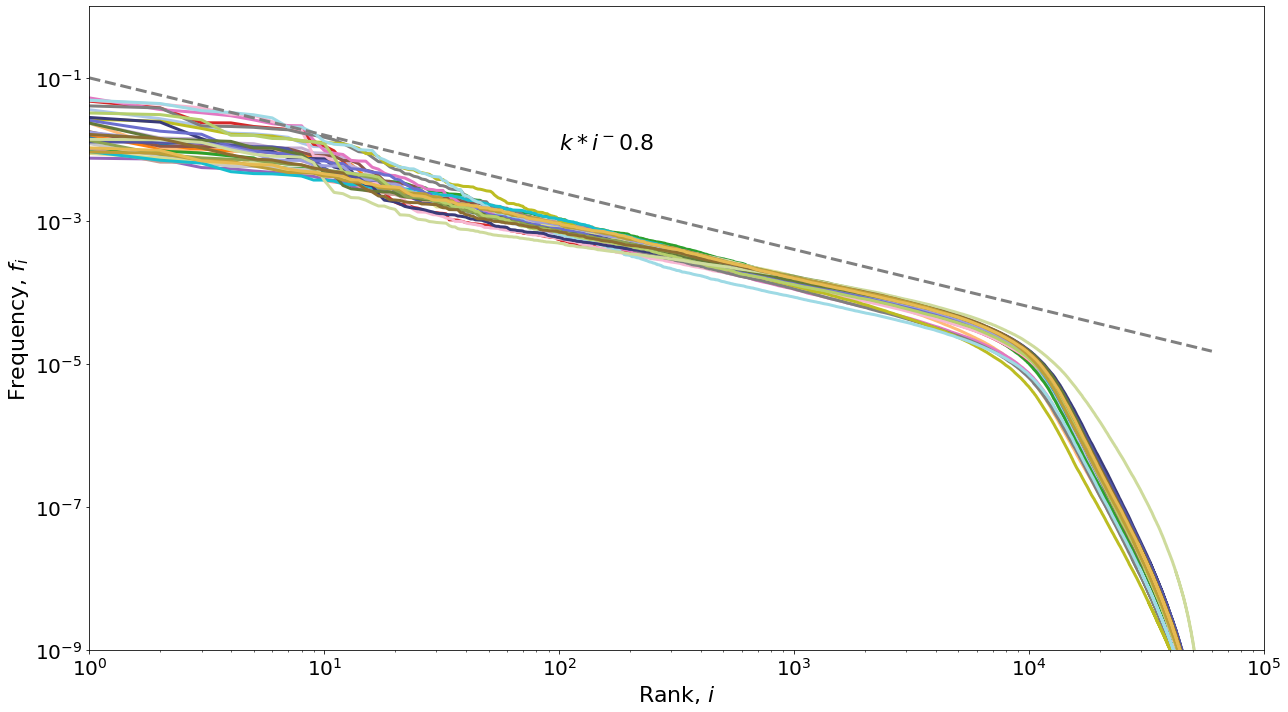

In [89]:
colors_gen = colors()

import pickle
with open("gtex_fdata.pkl", "rb") as f:
    plot_data=pickle.load(f)

fig, ax = plt.subplots(figsize=(18,10))

for tissue, f in plot_data.items():
    ax.plot((f/f.sum()).values, c=next(colors_gen))

ax.plot(np.linspace(1,6e4,10), 1e-1*np.power(np.linspace(1,6e4,10), -0.8), lw=3, c='gray', ls='--')
ax.annotate('$k*i^-0.8$',(1e2, 1e-2), fontsize=22)
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(1,1e5)
ax.set_ylim(1e-9,1e0)
ax.set_xlabel("Rank, $i$", fontsize=22)
ax.set_ylabel("Frequency, $f_i$", fontsize=22)

plt.show()

fig.savefig("zipf_GTEx.pdf")

In [87]:
import pickle
with open("gtex_fdata.pkl", "wb") as f:
    pickle.dump(plot_data, f)